# Image Analysis with LLaVA Vision Language Model

This notebook demonstrates how to use the Llava vision language model from Ollama to analyze images and answer questions about them.

## Setup and Import

In [1]:
# Import the module
from image_query_llava import ImageQuery, analyze_image

# Import other necessary libraries
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

## Download a Sample Image

We'll start by downloading a sample image to analyze.

Image saved to images/eiffel_tower.jpg


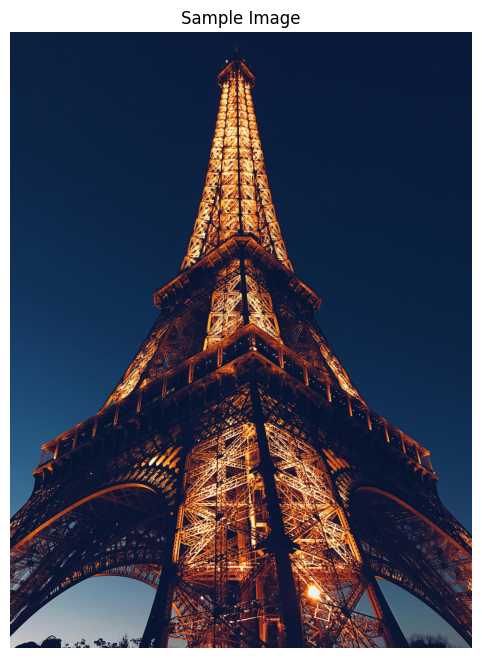

In [3]:
# Function to download an image
def download_image(url, save_path=None):
    # Add User-Agent header to mimic a browser request
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        if save_path:
            img.save(save_path)
            print(f"Image saved to {save_path}")
        return img
    else:
        print(f"Failed to download image: {response.status_code}")
        return None

# Create an 'images' directory if it doesn't exist
os.makedirs('images', exist_ok=True)

# Use more reliable image sources
# Example: Download an image of the Eiffel Tower from a more reliable source
image_url = "https://images.pexels.com/photos/699466/pexels-photo-699466.jpeg"
image_path = "images/eiffel_tower.jpg"
image = download_image(image_url, image_path)

# Check if image was successfully downloaded before displaying
if image:
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()
else:
    print("Unable to display image: Download failed")

## Initialize the LLaVA Model

Now we'll initialize the ImageQuery class to interact with the LLaVA model through Ollama.

In [4]:
# Initialize the ImageQuery class
image_querier = ImageQuery(model="llava:latest") #7b

# Verify that Ollama is running and the model is available
# If not, it will try to pull it automatically

## Query the Model with the Image

Let's ask some questions about the image.

In [5]:
# Ask a basic question about the image
question = "What landmark is shown in this image?"
response = image_querier.query_image(image_path, question)

print(f"Question: {question}")
print(f"Response: {response}")

Question: What landmark is shown in this image?
Response:  The image shows the Eiffel Tower, a famous landmark located in Paris, France. 


# Temps d'inférence avec sur une image avec le VML : *2m30.3s*

In [6]:
# Ask for more detailed information
question = "Describe this landmark in detail. Where is it located and when was it built?"
response = image_querier.query_image(image_path, question)

print(f"Question: {question}")
print(f"Response: {response}")

Question: Describe this landmark in detail. Where is it located and when was it built?
Response:  The image shows the Eiffel Tower, an iconic landmark located in Paris, France. It was designed by the engineer Gustave Eiffel and built between 1887 and 1889 as the entrance to the 1889 World's Fair (Exposition Universelle). The Eiffel Tower is a large wrought-iron lattice tower that stands at approximately 324 meters (1,053 feet) tall. It is one of the most recognizable structures in the world and a symbol of French culture. The photograph captures the tower during twilight with the lights illuminated, emphasizing its distinctive ironwork structure against the dark sky. 


## Remarque : 
La première inférence prend le plus de temps, ici ça n'a duré que *45secs*

## Batch Querying

We can also send multiple questions in a batch.

In [7]:
# Prepare a list of questions
questions = [
    "What is the height of this structure?",
    "What architectural style is this?",
    "What materials was this landmark built with?",
    "Is this a popular tourist attraction?"
]

# Batch query the model
responses = image_querier.batch_query(image_path, questions)

# Display questions and responses
for question, response in zip(questions, responses):
    print(f"Question: {question}")
    print(f"Response: {response}")
    print("--" * 40)

Question: What is the height of this structure?
Response:  The Eiffel Tower is a well-known landmark, and its official height as measured in 1889 when it was completed was 324 meters (1,063 feet) including the antenna. However, the antenna was removed in 1904 for various technical reasons. If you're referring to the tower without its antenna, which is how it often appears today, then its height is approximately 300 meters (984 feet). The image you provided shows the Eiffel Tower at night with lights on, and if we were to measure from the base of the tower to the topmost point where the lights are illuminated, that would be around 279 meters (906 feet), assuming standard lighting conditions. 
--------------------------------------------------------------------------------
Question: What architectural style is this?
Response:  The image you've provided shows the Eiffel Tower, an iconic structure located in Paris, France. It is a prime example of the Neoclassical architecture movement, ch

## Using the Simple Utility Function

We can also use the simple `analyze_image` utility function.

In [ ]:
# Download another image
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/800px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"
image_path = "images/mona_lisa.jpg"
image = download_image(image_url, image_path)

# Display the image
plt.figure(figsize=(8, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Another Sample Image")
plt.show()

# Use the utility function
question = "What is this painting and who created it?"
response = analyze_image(image_path, question)

print(f"Question: {question}")
print(f"Response: {response}")

## Analyzing an Image from a URL Directly

We can also analyze images directly from URLs without saving them first.

In [ ]:
# Get an image from a URL without saving it
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Monet_-_Impression%2C_Sunrise.jpg/800px-Monet_-_Impression%2C_Sunrise.jpg"
image = download_image(image_url)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.title("Image from URL")
plt.show()

# Query using the PIL Image object directly
question = "What style of painting is this and who might have painted it?"
response = image_querier.query_image(image, question)

print(f"Question: {question}")
print(f"Response: {response}")

## Conclusion

In this notebook, we've demonstrated how to use the Llava vision language model through Ollama to analyze images and answer questions about them. The `ImageQuery` class provides a flexible interface for working with images, and the `analyze_image` function offers a simple way to get quick answers about images.